In [3]:
import numpy as np
from pathlib import Path

from fastai.vision import *

from config import processed_data_dir


PATH = Path(processed_data_dir) / 'data_v3' / train

PATH

PosixPath('/Users/renier.botha/dev/personal/ds/zindi/farm-pin/data/processed/data_v3')

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(PATH,
                                  train='.',
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=256,
                                  num_workers=0).normalize()

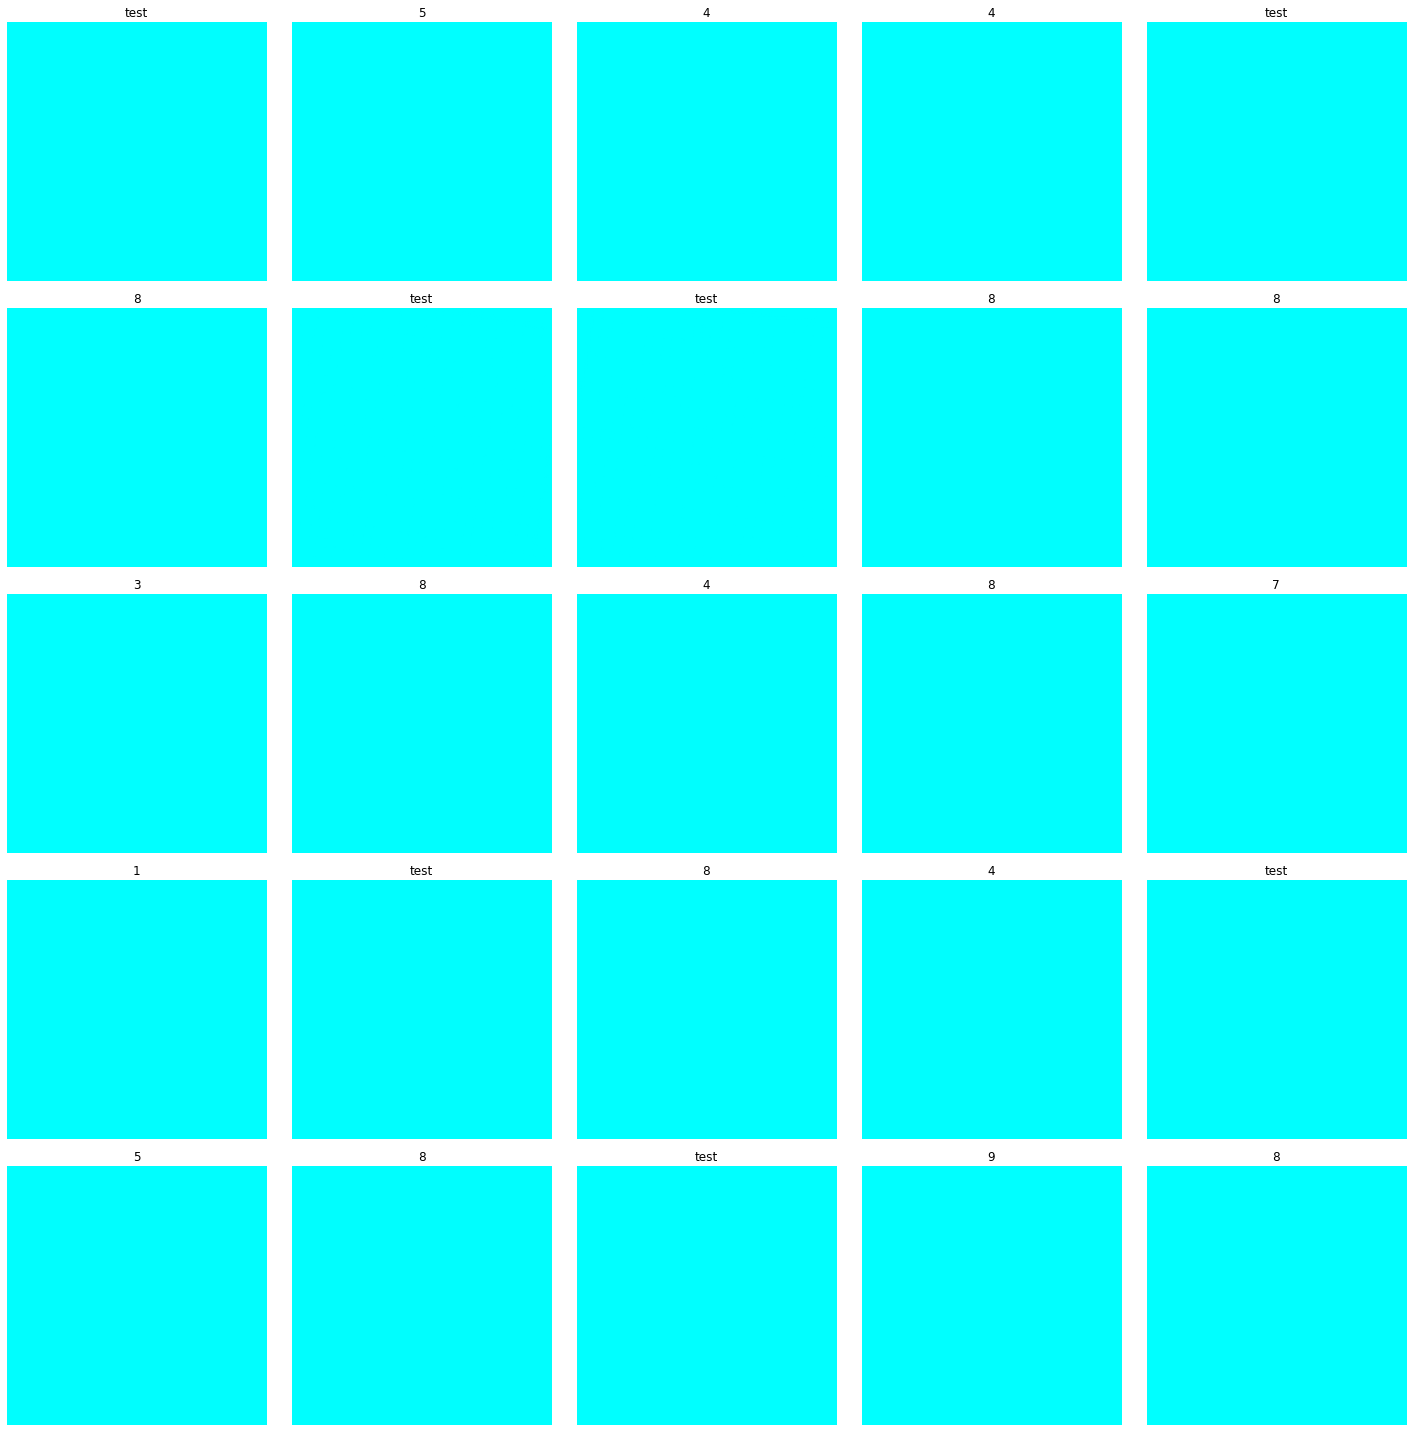

In [5]:
data.show_batch()

In [6]:
data.classes

['1', '2', '3', '4', '5', '6', '7', '8', '9', 'test']

In [7]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

In [38]:
learner.save('stage-1')

In [39]:
interp = ClassificationInterpretation.from_learner(learner)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

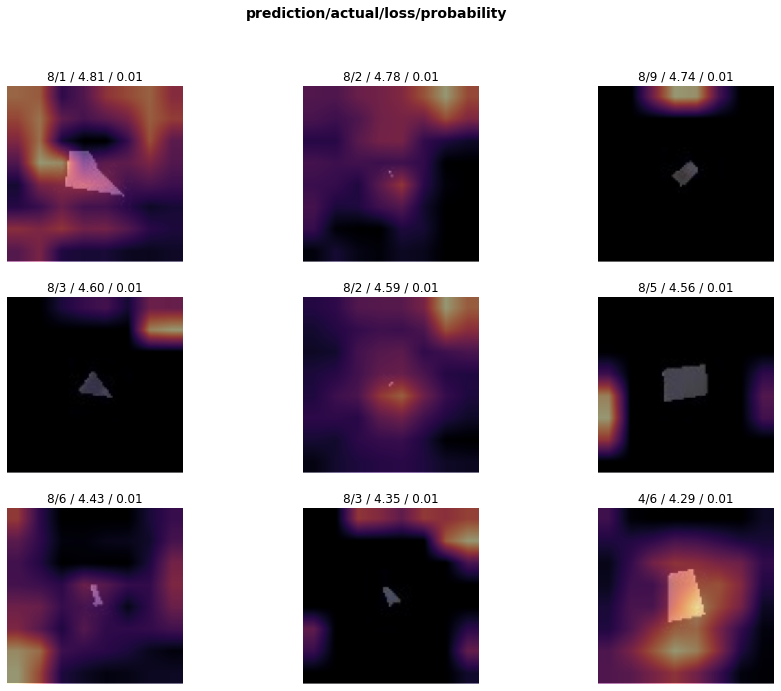

In [40]:
interp.plot_top_losses(9, figsize=(15,11))

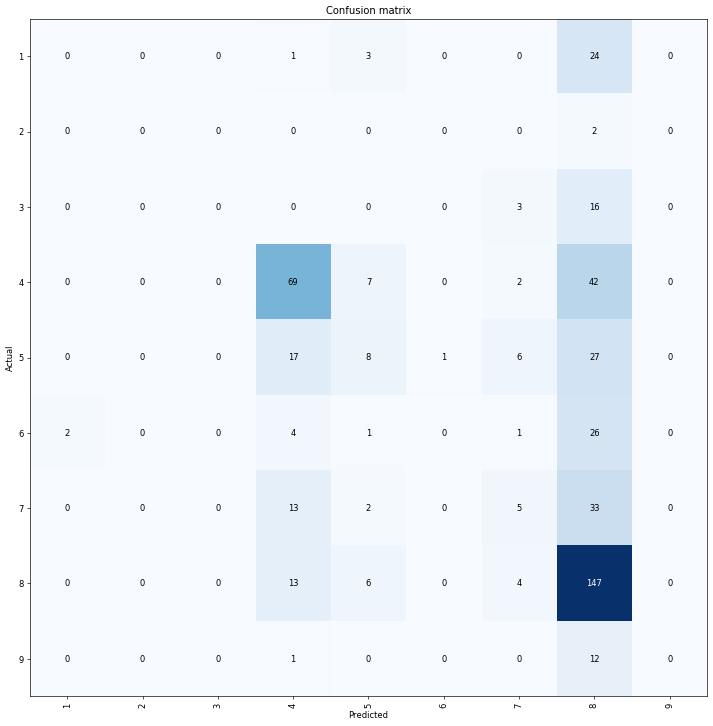

In [41]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [42]:
interp.most_confused(min_val=2)

[('4', '8', 42),
 ('7', '8', 33),
 ('5', '8', 27),
 ('6', '8', 26),
 ('1', '8', 24),
 ('5', '4', 17),
 ('3', '8', 16),
 ('7', '4', 13),
 ('8', '4', 13),
 ('9', '8', 12),
 ('4', '5', 7),
 ('5', '7', 6),
 ('8', '5', 6),
 ('6', '4', 4),
 ('8', '7', 4),
 ('1', '5', 3),
 ('3', '7', 3),
 ('2', '8', 2),
 ('4', '7', 2),
 ('6', '1', 2),
 ('7', '5', 2)]

In [43]:
learner.load('stage-1');

In [44]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


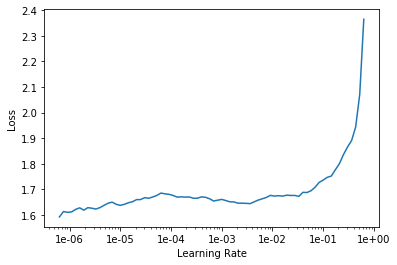

In [45]:
learner.recorder.plot()